Example Notebook
============

In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import sys
basedir = '../'
sys.path.append(basedir)

from lda_cgs import CollapseGibbsLda
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import sys
import pyLDAvis
import nltk

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
# read the file
fname = '../roundabout.txt'
with open(fname) as f:
    content = f.readlines()

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')
stemmer = PorterStemmer()

documents = []
vocab = []
for text in content:
    text = text.rstrip('\n')
    text = text.lower()
    processed = []
    for word in tokenizer.tokenize(text):
        # check if not a stopword
        if word not in (stopwords.words('english')):
            # then stem this word
            stemmed_word = stemmer.stem(word)
            processed.append(stemmed_word)
            vocab.append(stemmed_word)
    documents.append(processed)

print documents

[[u'trebl', u'one', u'squadron', u'trebl', u'one', u'squadron', u'famou', u'aerobat', u'unit', u'royal', u'air', u'forc', u'make', u'last', u'public', u'appear', u'reconstitut', u'fighter', u'unit', u'breathtak', u'display', u'precis', u'fli'], [u'chines', u'dragon', u'festiv', u'golden', u'dragon', u'perform', u'vancouv'], [u'wimbledon', u'school', u'art', u'student', u'south', u'east', u'asia', u'learn', u'modern', u'techniqu', u'appli', u'tradit', u'ceram', u'art'], [u'new', u'zealand', u'sail', u'sail', u'outdoor', u'activ', u'new', u'zealand'], [u'royal', u'show', u'royal', u'show', u'import', u'british', u'agricultur', u'event', u'year'], [u'motor', u'race', u'school', u'school', u'motor', u'race', u'student'], [u'burma', u'candl', u'candl', u'manufactur', u'burma'], [u'british', u'circu', u'train', u'quarter', u'watch', u'daili', u'practic', u'session', u'britain', u'circu', u'artist', u'world'], [u'outward', u'bound', u'school', u'show', u'youth', u'leader', u'pakistan', u'indi

In [30]:
# construct dictionary
vocab = list(set(vocab))
dictionary = {}
n = 0
for word in vocab:
    dictionary[word] = n
    n += 1

# test the dictionary
for word in vocab:
    print word + ' at position ' + str(dictionary[word])

nurseri at position 0
four at position 1
rapid at position 2
asian at position 3
mansion at position 4
captain at position 5
locat at position 6
whose at position 7
educ at position 8
auspic at position 9
jaipur at position 10
swan at position 11
bike at position 12
buyer at position 13
lord at position 14
348 at position 15
merchant at position 16
everi at position 17
risk at position 18
tenni at position 19
govern at position 20
embroider at position 21
school at position 22
prize at position 23
motorcyclist at position 24
wooden at position 25
frigat at position 26
red at position 27
apertur at position 28
knitwear at position 29
paperback at position 30
direct at position 31
horn at position 32
sanderson at position 33
hors at position 34
street at position 35
fleec at position 36
glasshous at position 37
even at position 38
christ at position 39
kaitak at position 40
lightn at position 41
asia at position 42
conduct at position 43
new at position 44
net at position 45
dyrenforth a

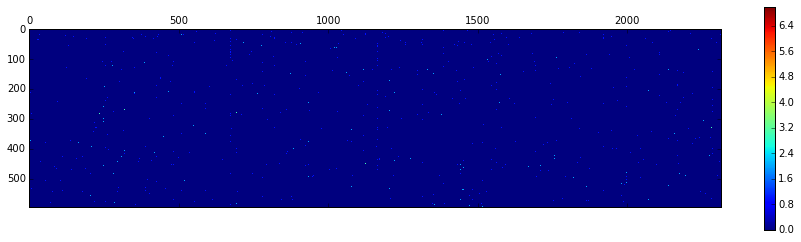

In [45]:
# create the input to LDA
D = len(documents)
N = len(dictionary)
doc_arr = np.zeros((D, N), dtype=np.int64)
for d in range(D):
    doc = documents[d]
    for word in doc:
        word_pos = dictionary[word]
        doc_arr[d, word_pos] += 1

plt.matshow(doc_arr)
plt.colorbar()
plt.show()

df = pd.DataFrame(doc_arr)
vocab = np.array(vocab)

In [56]:
n_topics = 20
n_samples = 500
n_burn = 0
n_thin = 1
alpha = 50.0/n_topics
beta = 0.1

In [57]:
gibbs1 = CollapseGibbsLda(df, vocab, n_topics, alpha, beta)
gibbs1.run(n_burn, n_samples, n_thin, use_native=True)

CGS LDA initialising
............................................................
Using Numba for LDA sampling
Preparing words
Preparing Z matrix
DONE
Sample 1   Log joint likelihood = -74310.870 
Sample 2   Log joint likelihood = -72952.061 
Sample 3   Log joint likelihood = -72107.825 
Sample 4   Log joint likelihood = -72120.056 
Sample 5   Log joint likelihood = -71965.570 
Sample 6   Log joint likelihood = -71725.263 
Sample 7   Log joint likelihood = -71456.635 
Sample 8   Log joint likelihood = -71679.896 
Sample 9   Log joint likelihood = -71740.814 
Sample 10   Log joint likelihood = -71441.649 
Sample 11   Log joint likelihood = -71380.796 
Sample 12   Log joint likelihood = -71183.350 
Sample 13   Log joint likelihood = -71362.521 
Sample 14   Log joint likelihood = -71216.901 
Sample 15   Log joint likelihood = -71119.610 
Sample 16   Log joint likelihood = -71059.205 
Sample 17   Log joint likelihood = -70967.404 
Sample 18   Log joint likelihood = -71178.389 
Sample 19   

In [58]:
topic_word = gibbs1.topic_word_
n_top_words = 20
for i, topic_dist in enumerate(topic_word):
    topic_words = vocab[np.argsort(topic_dist)][:-n_top_words:-1]
    print('Topic {}: {}'.format(i, ' '.join(topic_words)))

Topic 0: london colleg student work decor asian furnitur sculptur train servic teach deaf oversea bbc year largest stanley experiment record
Topic 1: water use british rider grass london armi australian train glide oper new made harvest dragon english thailand export perform
Topic 2: british villag blind ralli east korea children man display day asian korean malaysia local market plant ride nurs ship
Topic 3: manufactur visit malaysian student train offic time research race textil modern use sent method confer build world colleg metal
Topic 4: engin children centr one singapor music puppet toy student farnborough tv famou marin shipbuild estat year sea research derbi
Topic 5: india modern colombo festiv art bicycl stori famou danc home design tattoo giant ceremoni john burmes techniqu forc steel
Topic 6: exhibit institut scotland display ceylon tea develop plan prepar young dancer boat first comput citi wale north sri parliament
Topic 7: thailand station boat malaysia art studi made ma

2. LDAVis
----------

Visualise topics using LDAVis. First prepare the data to display.

In [59]:
data = {}
data['topic_term_dists'] = gibbs1.topic_word_
data['doc_topic_dists'] = gibbs1.doc_topic_
data['doc_lengths'] = gibbs1.cd
data['vocab'] = gibbs1.vocab
data['term_frequency'] = np.sum(gibbs1.ckn, axis=0)

In [60]:
print np.sum(gibbs1.ckn, axis=0).shape

(2313,)


Check to make sure everything's correct ..

Topic-Term shape: (20, 2313)
Doc-Topic shape: (597, 20)
597
<type 'numpy.ndarray'>
nurseri
four
(20, 2313)
(597, 20)
(597,)
(2313,)


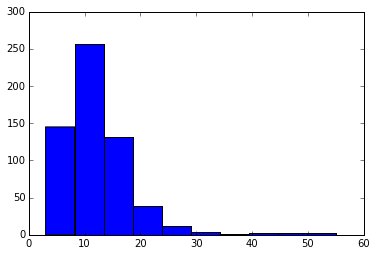

In [61]:
print('Topic-Term shape: %s' % str(data['topic_term_dists'].shape))
print('Doc-Topic shape: %s' % str(data['doc_topic_dists'].shape))
print len(data['doc_lengths'])
plt.hist(data['doc_lengths'])
print type(data['vocab'])
print data['vocab'][0]
print data['vocab'][1]
print data['topic_term_dists'].shape
print data['doc_topic_dists'].shape
print data['doc_lengths'].shape
print data['term_frequency'].shape

In [62]:
vis_data = pyLDAvis.prepare(**data)

In [63]:
pyLDAvis.display(vis_data)